<a href="https://colab.research.google.com/github/gbrlribeiro/si221/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part  1

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, metrics
import random
%matplotlib inline
np.random.seed(0)
def generate_dataset(num_points, sigma):
  # Create array of labels uniformly distributed between {0,1,2}
  labels = []
  for i in range(num_points):
    labels.append(np.random.choice([0,1,2], None, True, p=[1/3, 1/3, 1/3]))

  # Randomly shuffle
  np.random.shuffle(labels)

  # Generate each Xi vector pair associated with Yi
  inputs = []
  gauss1 = []
  gauss2 = []
  gauss3 = []
  cov = sigma * np.identity(2)
  for yi in labels:

    if yi == 0:
      mu = [-1,1]
      xi = np.random.multivariate_normal(mu, cov)
      gauss1.append(xi)
      inputs.append(xi)

    elif yi == 1:
      mu = [1,1]
      xi = np.random.multivariate_normal(mu, cov)
      gauss2.append(xi)
      inputs.append(xi)

    else:
      mu = [0,1]
      xi = np.random.multivariate_normal(mu, cov)
      gauss3.append(xi)
      inputs.append(xi)

  center1 = random.sample(gauss1, 1)
  center2 = random.sample(gauss2, 1)
  center3 = random.sample(gauss3, 1)

  center1 = np.asarray(center1)
  center2 = np.asarray(center2)
  center3 = np.asarray(center3)

  return inputs, center1, center2, center3, labels

Initialize the centroids

In [5]:

X, u1, u2, u3, Y = generate_dataset(300, 0.05)
centroid = [u1, u2, u3]
centroid = np.asarray(centroid)

Implementing K-means

In [6]:
from copy import deepcopy

# Number of clusters
K = 3

X_array = np.array(X)

In [7]:
def K_means(X_array, centroid, error_condition, show_dist):


  centers_old = np.zeros(centroid.shape) # to store old centers
  centers_new = deepcopy(centroid) # Store new centers

  n = X_array.shape[0]

  clusters = np.zeros(n)
  distances = np.zeros((n,K))
  centers_list = []
  error = np.linalg.norm(centers_new - centers_old)

  costs = []
  cost_list = []
  cost_old = 0
  cost = 0
  t = 0
  

  # When, after an update, the estimate of that center stays the same, exit loop
  while error != 0:
      
      t = t + 1

      cost = 0

      # Measure the distance to every center
      for i in range(K):
          distances[:,i] = np.linalg.norm(X_array - centers_new[i], axis=1)
      # Assign all training data to closest center

      clusters = np.argmin(np.square(distances), axis = 1)

      centers_old = deepcopy(centers_new)
      centers_list.append(centers_old)

      # Calculate mean for every cluster and update the center
      for i in range(K):
          centers_new[i] = np.mean(X_array[clusters == i], axis=0)
          cost = cost + np.sum(np.square(np.linalg.norm(X_array[clusters == i] - centers_new[i], axis=1)))
          #this is only for part 1.5 - not part of the algorithm
          if i == 1: 
            cost_list.append(np.sum(np.square(np.linalg.norm(X_array[clusters == i] - centers_new[i], axis=1))))
      costs.append(cost)

      if (error_condition == 0):
        error = np.linalg.norm(centers_new - centers_old)
      else:
        error = cost_old-cost
        cost_old = cost
      
  #for part 1.5
  if show_dist == 1:
    centroid_cost_min = centers_list[np.argmin(cost_list)]
    centroid_cost_min = centroid_cost_min[1]
    print("distance between optimal centroid and mean for cluster 1: ", np.linalg.norm(centroid_cost_min-np.mean(X_array[clusters == 1])))
  return t, centers_new, costs, clusters

Text(0, 0.5, 'y coordinate')

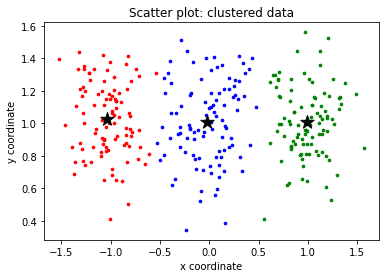

In [8]:
T, centers, costs, clusters = K_means(X_array, centroid, 0, 0)
centers = np.reshape(centers, (3,2))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(K):
  points = np.array([X_array[j] for j in range(len(X_array)) if clusters[j] == i])
  ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='#050505')
plt.title("Scatter plot: clustered data")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")

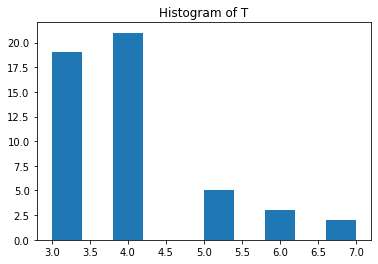

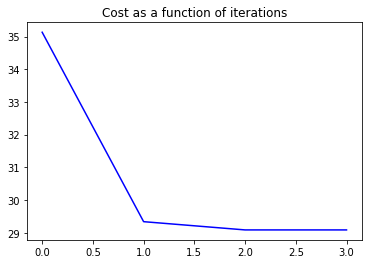

In [9]:
#Plot cost(t)

iterations = 50

T_array = []

for i in range(iterations):
  X, u1, u2, u3, Y = generate_dataset(300, 0.05)
  centroid = [u1, u2, u3]
  centroid = np.asarray(centroid)
  X_array = np.array(X)
  T, centers, costs, clusters = K_means(X_array, centroid, 0, 0)
  T_array.append(T)

plt.hist(T_array)
plt.title('Histogram of T')
plt.show()

plt.plot([t for t in range(T)], [cost for cost in costs], color='blue')
plt.title('Cost as a function of iterations')
plt.show()

Random centroids

6.12


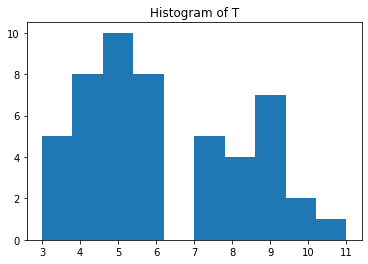

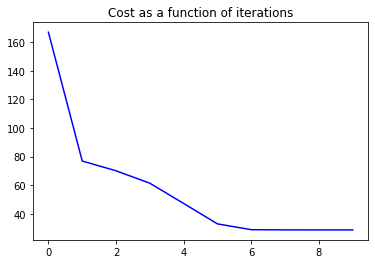

In [10]:


#Plot cost(t)

iterations = 50

T_array = []

for i in range(iterations):
  X, u1, u2, u3, Y = generate_dataset(300, 0.05)
  X_array = np.array(X)
  centroid = random.sample(X, K)
  centroid = np.asarray(centroid)
  T, centers, costs, clusters = K_means(X_array, centroid, 0, 0)
  T_array.append(T)

print(np.mean(T_array))
plt.hist(T_array)
plt.title('Histogram of T')
plt.show()

plt.plot([t for t in range(T)], [cost for cost in costs], color='blue')
plt.title('Cost as a function of iterations')
plt.show()

Part 1.4

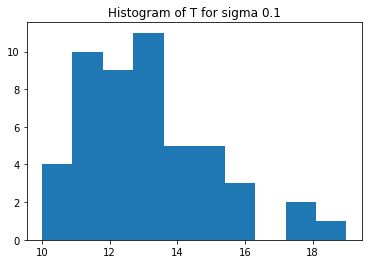

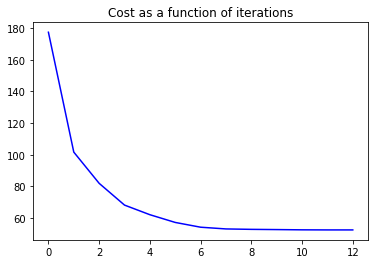

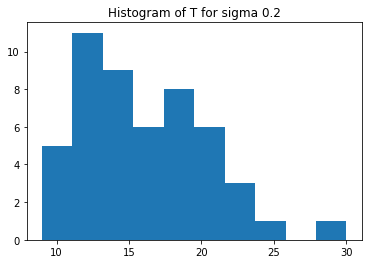

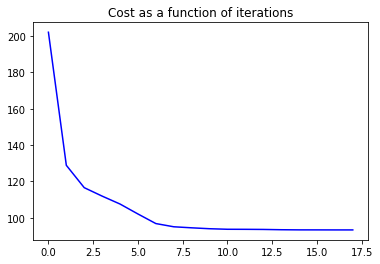

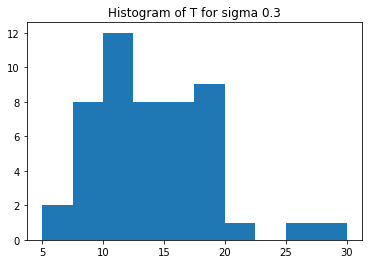

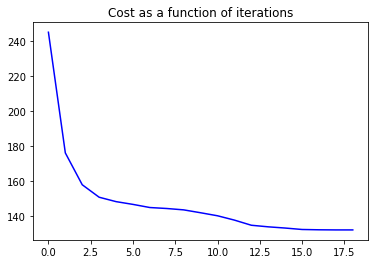

In [11]:
#Plot cost(t)

iterations = 50
T_array = []
  


for sigma in [0.1,0.2,0.3]:
  for i in range(iterations):
    X, u1, u2, u3, Y = generate_dataset(300, sigma)
    X_array = np.array(X)
    cenroid = random.sample(X, K)
    T, centers, costs, clusters = K_means(X_array, centroid, 1, 0)
    T_array.append(T)

  plt.hist(T_array)
  plt.title('Histogram of T for sigma ' + str(sigma))
  plt.show()
  T_array.clear()

  plt.plot([t for t in range(T)], [cost for cost in costs], color='blue')
  plt.title('Cost as a function of iterations')
  plt.show()


Part 1.5

distance between optimal centroid and mean for cluster 1:  0.011741790654784309


Text(0, 0.5, 'y coordinate')

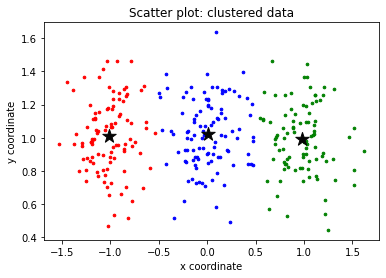

In [12]:
X, u1, u2, u3, Y = generate_dataset(300, 0.05)
centroid = [u1, u2, u3]
centroid = np.asarray(centroid)
X_array = np.array(X)

T, centers, costs, clusters = K_means(X_array, centroid, 0, 1)
centers = np.reshape(centers, (3,2))

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(K):
  points = np.array([X_array[j] for j in range(len(X_array)) if clusters[j] == i])
  ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='#050505')
plt.title("Scatter plot: clustered data")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")

Random centroids L1 norm (Part 1.6)

In [13]:
def K_means_L1(X_array, centroid, error_condition):


  centers_old = np.zeros(centroid.shape) # to store old centers
  centers_new = deepcopy(centroid) # Store new centers

  n = X_array.shape[0]

  clusters = np.zeros(n)
  distances = np.zeros((n,K))

  error = np.linalg.norm(centers_new - centers_old)

  costs = []

  cost_old = 0

  t = 0

  # When, after an update, the estimate of that center stays the same, exit loop
  while error != 0:
      
      t = t + 1
      cost = 0

      # Measure the distance to every center
      for i in range(K):
          distances[:,i] = np.linalg.norm(X_array - centers_new[i], axis=1)
      # Assign all training data to closest center
      clusters = np.argmin(np.square(distances), axis = 1)
  
      centers_old = deepcopy(centers_new)
      # Calculate mean for every cluster and update the center
      for i in range(K):
          centers_new[i] = np.mean(X_array[clusters == i], axis=0)
          cost = cost + np.sum(np.absolute(X_array[clusters == i] - centers_new[i]))
      costs.append(cost)

      if (error_condition == 0):
        error = np.linalg.norm(centers_new - centers_old)
      else:
        error = cost_old-cost
        cost_old = cost

  centers_new 
  return t, centers_new, costs

Average number of iterations 6.82


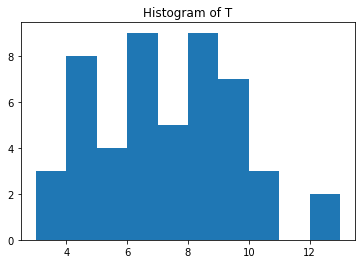

Minimal cost 102.41242109365558


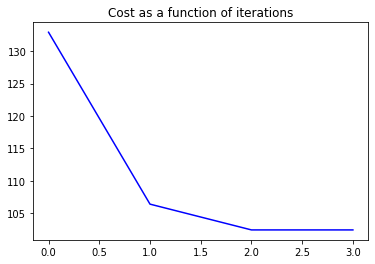

In [14]:
#Plot cost(t)

iterations = 50

T_array = []

for i in range(iterations):
  X, u1, u2, u3, Y = generate_dataset(300, 0.05)
  X_array = np.array(X)
  centroid = random.sample(X, K)
  centroid = np.asarray(centroid)
  T, centers, costs = K_means_L1(X_array, centroid, 0)
  T_array.append(T)

plt.hist(T_array)
print("Average number of iterations", np.mean(T_array))
plt.title('Histogram of T')
plt.show()

print("Minimal cost", min(costs))
plt.plot([t for t in range(T)], [cost for cost in costs], color='blue')
plt.title('Cost as a function of iterations')
plt.show()

Part 1.6.b

In [15]:

def K_median_L1(X_array, centroid, error_condition, show_dist):


  centers_old = np.zeros(centroid.shape) # to store old centers
  centers_new = deepcopy(centroid) # Store new centers
  centers_list = []
  n = X_array.shape[0]

  clusters = np.zeros(n)
  distances = np.zeros((n,K))

  error = np.linalg.norm(centers_new - centers_old)

  costs = []
  cost_list = []
  cost_old = 0

  t = 0

  # When, after an update, the estimate of that center stays the same, exit loop
  while error != 0:
      
      t = t + 1
      cost = 0

      # Measure the distance to every center
      for i in range(K):
          distances[:,i] = np.linalg.norm(X_array - centers_new[i], axis=1)
      # Assign all training data to closest center
      clusters = np.argmin(np.square(distances), axis = 1)
  
      centers_old = deepcopy(centers_new)
      centers_list.append(centers_old)
      # Calculate median for every cluster and update the center
      for i in range(K):
          centers_new[i] = np.median(X_array[clusters == i], axis = 0)
          cost = cost + np.sum(np.absolute(X_array[clusters == i] - centers_new[i]))
          if i == 1:
            cost_list.append(np.sum(np.absolute(X_array[clusters == i] - centers_new[i])))
      costs.append(cost)

      if (error_condition == 0):
        error = np.linalg.norm(centers_new - centers_old)
      else:
        error = cost_old-cost
        cost_old = cost

  if show_dist == 1:
    centroid_cost_min = centers_list[np.argmin(cost_list)]
    centroid_cost_min = centroid_cost_min[1]
    print("distance between optimal centroid and mean for cluster 1: ", np.linalg.norm(centroid_cost_min-np.median(X_array[clusters == 1])))
  return t, centers_new, costs, clusters


Average number of iterations 6.62


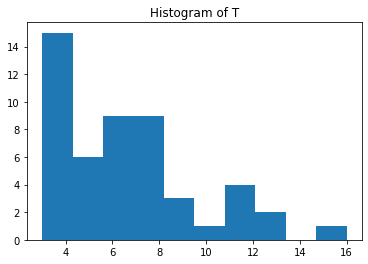

Minimal cost 105.44236597046117


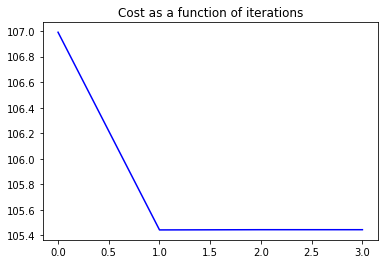

In [16]:
#Plot cost(t)

iterations = 50

T_array = []

for i in range(iterations):
  X, u1, u2, u3, Y = generate_dataset(300, 0.05)
  X_array = np.array(X)
  centroid = random.sample(X, K)
  centroid = np.asarray(centroid)
  T, centers, costs, clusters = K_median_L1(X_array, centroid, 0, 0)
  T_array.append(T)

plt.hist(T_array)
print("Average number of iterations", np.mean(T_array))
plt.title('Histogram of T')
plt.show()

print("Minimal cost", min(costs))
plt.plot([t for t in range(T)], [cost for cost in costs], color='blue')
plt.title('Cost as a function of iterations')
plt.show()

Part 1.6c

distance between optimal centroid and mean for cluster 1:  0.2888776660160612
Number of iterations: 3


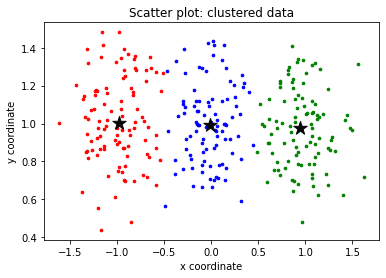

In [17]:
X, u1, u2, u3, Y = generate_dataset(300, 0.05)
centroid = [u1, u2, u3]
centroid = np.asarray(centroid)
X_array = np.array(X)

T, centers, costs, clusters = K_median_L1(X_array, centroid, 0, 1)
centers = np.reshape(centers, (3,2))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(K):
  points = np.array([X_array[j] for j in range(len(X_array)) if clusters[j] == i])
  ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='#050505')
plt.title("Scatter plot: clustered data")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")

print("Number of iterations:", T)